# Interactive panels as explorative tools of visual sources: deepening Warburgs’ epistemological principles

 ### Sergio Rodríguez Gómez [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0002-1631-4747) 
Pontifica Universidad Javeriana

### Juan Felipe Urueña Calderón [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0003-0576-159X) 
Universidad Nacional de Colombia


[![cc-by](https://licensebuttons.net/l/by/4.0/88x31.png)](https://creativecommons.org/licenses/by/4.0/) 
©<AUTHOR or ORGANIZATION / FUNDER>. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY](https://creativecommons.org/licenses/by/4.0/)


[![cc-by-nc-nd](https://licensebuttons.net/l/by-nc-nd/4.0/88x31.png)](https://creativecommons.org/licenses/by-nc-nd/4.0/) 
©<AUTHOR or ORGANIZATION / FUNDER>. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/4.0/)


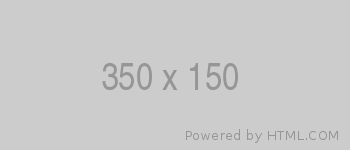

In [6]:
from IPython.display import Image, display

display(Image("./media/placeholder.png"))

 (optional) This article was orginally published (...)

FirstKeyword, SecondKeyword, AlwaysSeparatedByAComma

In this article we propose a methodology and a tool for exploring visual collections, based on the interrelations of historical and iconographic connections, through the use of interactive storytelling. The methodology in question is strongly inspired by the work of the art historian Aby Warburg and, most especifically, by his Atlas Mnemosyne project; in this line we propose a way of using an open source, bilingual, JavaScript library called Aventura.js, developed by one of the authors, to create interactive iconographic panels organized in semantic spaces.
Following the structure of the Journal, the article is organized in three overlapping and intertwining layers: the narrative layer of the article presents the context and the epistemological principles originally proposed by Warburg on his Atlas Mnemosyne project at the beginning of the XX century, and also to reflect on new ways to study visual source materials by using digital tools that help to algorithmically structure the semantic relationships between images and to interactively allow an audience to explore them following the insights of warburg. We will discuss the need to develop specific tools to visualize qualitative data in image corpuses in humanities and social sciences. The hermeneutic layer of the article presents the development of the Aventura.js library, its relation to the tradition of electronic literature and its practices, and the most central element of the article: to propose how this programming library can be used as a tool to create interactive exploratory panels that follow the spirit and extend the meaning possibilities of the Atlas Mnemosyne strategy. Concretely, panels organized in 2D space according to categories related to the persistence of iconographic motifs in collective memory, but, additionally, organized in 3D space, which we could call the hipertextual z-axis, in terms of depth of meaning elaboration and intertextuality. As an exemplification of the methodology and the tool, we will provide an example dataset, which consists of a collection of images that are iconographically related to the figure of the “carguero” (Man carrier), a typical character of the 19th century Colombian visual culture, and its interpretative metadata. We will propose an exercise of meaning scale reduction that shows how focusing attention on figures, characters or iconographic details (instead of authors, works or genres) allows a better understanding of the images trajectories between different visual regimes, geographical spaces and historical periods. With this dataset, we will develop all the steps involved in the design of an interactive panel: the creation of a collection, the annotation of the images, the algorithmic analysis and creation of semantic spaces, the construction of a narrative space through the use of hypertext, and the final design decisions. Additionally we will critically discuss the reach and limitations of this methodology and tool and possible further developments.

## Introduction

This is the first paragrah of running text with a citation example 

This is a hermeneutic paragraph

Editor|1641|1798|1916
---|---|---|---
Senan|0.55|0.4|0.3
Henry|0.71|0.5|0.63

In [4]:
# Check your Python version
from platform import python_version
python_version()

#!python -V

'3.7.13'

In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import cv2

from observable_jupyter import embed
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

px = 1/plt.rcParams['figure.dpi']  # variable used to convert inches to pixels

from io import BytesIO
import base64

from IPython import display

In [2]:
# Helper functions

def rescale(img, scale): # Rescale the images to fit into the panel
  w = img.shape[1]
  h = img.shape[0]
  n_w = int(w * scale)
  n_h = int(h * scale)
  return cv2.resize(img, (n_w, n_h))

def get_image(path): # Get the image from url, rescale and return matplotlib's offsetimage
    img = io.imread(path)
    img = rescale(img, rescale_factor)
    return OffsetImage(img)

def get_hue(img): # Get hue value of image
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hue = img_hsv[:, :, 0].mean()
    return hue

In [3]:
# Data loading and extraction of computational features

data_path = "https://docs.google.com/spreadsheets/d/1xkt2R62trJRBdELOjTXikNjl-sC0aR4R6ojQHygH6wc/export?format=csv"
# data_path = "https://docs.google.com/spreadsheets/d/18Q2xspVUAFpxBcCscxFIxc99k-uYKHCsDnv54tTvt1o/export?format=csv"
df = pd.read_csv(data_path)
df['Url'] = "https://lh3.googleusercontent.com/d/" + df['id']

# Tal vez esto podría ser un loop que saca los datos computacionales de una sola pasada
img_memos = {}
for url in df['Url']: # an optimization to load images just once and to obtain sizes
    img = io.imread(url)
    
    if 3 > len(img.shape): # convert monochrome images to rgb
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        
    img_memos[url] = {'img': img}
    img_memos[url]['width'] = img.shape[1]
    img_memos[url]['height'] = img.shape[0]
    
df['Hue'] = [get_hue(img_memos[url]['img']) for url in df['Url']]
df['Width'] = [img_memos[url]['width'] for url in df['Url']]
df['Height'] = [img_memos[url]['height'] for url in df['Url']]
df

,obras,autor,fecha,medio,tecnica,material,alto,ancho,fuente,descripción,...,direcciónCargado,generoCargado,figura/fondo,genero,soporte,otros,Url,Hue,Width,Height
0,Indio yumbo,Vicente Albán,1783.0,Pintura,Óleo,lienzo,80,109,"Museo de América, Madrid",6 cuadros dedicados a la representación de tip...,...,NaN,NaN,equilibrio,castas,cuadro,NaN,https://lh3.googleusercontent.com/d/1cNLgHTfbL...,98.956401,1450,1050
1,"Quadro de Historia Natural, Civil, y Geográfic...",Luis Thiebaut. Comisionado por José Ignacio Le...,1799.0,Pintura,Óleo,lienzo,118.5,331,"Museo Nacional de Ciencias Naturales, Madrid",Es un cuadro único por su composición y por el...,...,NaN,NaN,fondo,castas,cuadro,NaN,https://lh3.googleusercontent.com/d/1zdMctokZi...,63.952055,922,920
2,Modos de cargar los indios a los que caminan p...,Anónimo. Expedición Malaspina,1791.0,Pintura,Acuarela,papel,57,42,"Museo de América, Madrid","Ante un fondo de montañas nevadas un indio, de...",...,adelante,masculino,figura,castas,lamina,NaN,https://lh3.googleusercontent.com/d/1bp9nL0SAU...,97.575995,794,1050
3,Camino por las montañas de la provincia de Ant...,Anónimo,1800.0,Pintura,Dibujo,papel,NI,NI,"Archivo General de Indias, MP-ESTAMPAS,257","Dibujo que ilustra el ""Camino por las montañas...",...,atras,femenino,equilibrio,plano,lamina,NaN,https://lh3.googleusercontent.com/d/151htVNkHx...,88.907860,1600,1071
4,Modo de entrar a la provincia de Antioquía,Anónimo,1802.0,Pintura,Dibujo,papel,NI,NI,"Archivo General de Indias, MP-ESTAMPAS,257Bis","Dibujo que representa: ""Modo de entrar a la pr...",...,atras,femenino,equilibrio,plano,lamina,NaN,https://lh3.googleusercontent.com/d/1erNK-R62t...,76.664909,1600,1114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Afiche exposición de arte La naturaleza de las...,Halim Badawi (Curador),2019.0,Cartel digital,Afiche publicitario,digital,NaN,NaN,"Museo de Arte, Universidad Nacional de Colombia",NaN,...,NaN,femenino,figura,arte,exposicion,NaN,https://lh3.googleusercontent.com/d/1911S3GbVC...,98.278111,1280,720
89,El reverso oscuro de la ciencia ilustrada. La ...,Felipe Sánchez Villareal,2019.0,Artículo de prensa,Reseña Exposición de arte,digital,NaN,NaN,"Semana 9 de mayo, 2019",NaN,...,NaN,femenino,figura,opinion,prensa,NaN,https://lh3.googleusercontent.com/d/1ERA3Xdj5n...,41.034137,960,827
90,El carguero,Jean Lucumi,2019.0,Performance,Performance de larga duración,cuerpo,NaN,NaN,Laboratorio de creación Experimenta SUR 2019,Estas son las palabras del artista: '(…) Con e...,...,NaN,NaN,figura,arte,performance,NaN,https://lh3.googleusercontent.com/d/1iZTFWC3Lm...,98.442302,719,394
91,Gold in the morning,Alfredo Jaar,1985.0,Fotografía,Fotografía en tres cajas de luz,film,25,40,"Colección Proyecto Bachué, Bogotá. Foto: Goeth...",Esta obra fue expuesta en la Exposición La nat...,...,NaN,NaN,figura,arte,fotografia,True,https://lh3.googleusercontent.com/d/1nvvMa5pwt...,89.905569,900,600


Algunas categorías de algunas columnas de la tabla de piezas pueden funcionar como filtros que reducen el número de obras que se presenta en cada panel

Estas categorías pueden describirse además en una tabla complementaria y esas descripciones pueden servir como un hilo conductor para construir el eje z del panel

La ventaja de pensar la categoría como filtro es que puede servir para saltar de una columna a otra o de una categoría a otra de una forma que es, relativamente, automatizable

In [4]:
# General settings for the panel
rescale_factor = 0.05

In [8]:
def layout_panel(df, xlabel, ylabel, width=900, height=900):
    
    # Define images paths and axes for base scatter plot
    paths = df['Url']
    x = df[xlabel]
    y = df[ylabel]

    # Create the base scatter plot
    fig, ax = plt.subplots()
    fig.set_size_inches(width * px, height * px)
    #  ax.set_title("Feature Space")
    ax.scatter(x, y)
    ax.set_facecolor('xkcd:gray')

    # Put an image over each point in the base scatter plot
    for x0, y0, path in zip(x, y, paths):
        ab = AnnotationBbox(get_image(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

    plt.draw()

    # Encode the panel as base 64

    encoded = BytesIO()
    plt.savefig(encoded, format='png')
    encoded = base64.b64encode(encoded.getvalue()).decode("utf-8").replace("\n", "")
    encoded = f'data:image/png;base64,{encoded}'
    
    plt.close()
    
    return encoded
    


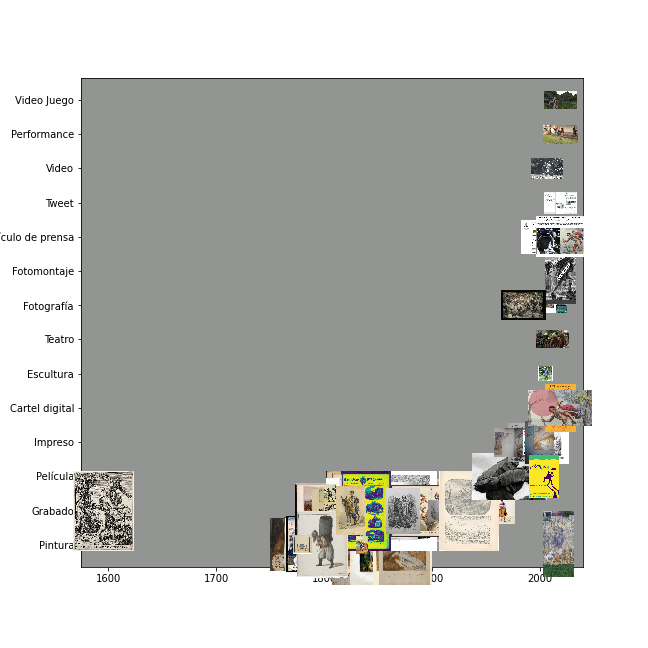

In [9]:
new_df = df[df["figura/fondo"] == "equilibrio"]

encoded = layout_panel(df, "fecha", "medio")

display.HTML(f'<img src="{encoded}"/>')


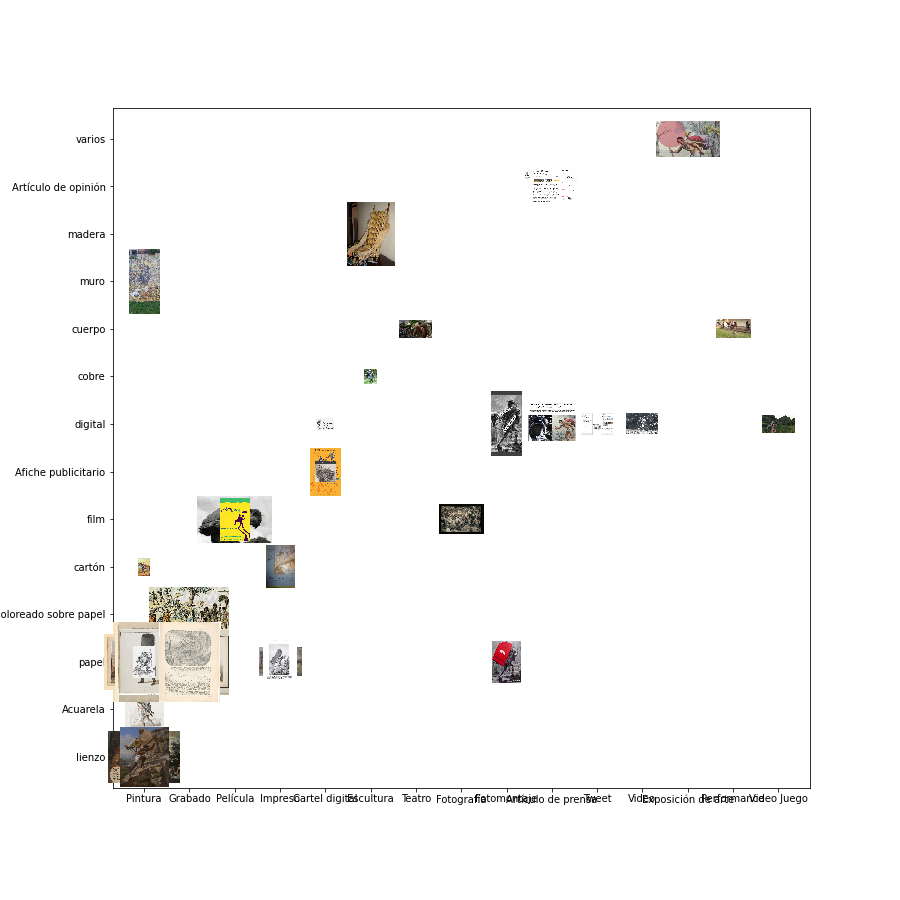

In [69]:
encoded = layout_panel(df, "medio", "material")
display.HTML(f'<img src="{encoded}"/>')

In [81]:
# Dictionary that contains the structure of the scenes

scenes = {
    "start": {
        "text": "This is a panel loaded from Observable",
        "image": encoded
    },
    "end": {
        "text": "You clicked on an area",
        "scene": "start"
    }
}

In [114]:
# Get the x and y data and transform it into pixel coordinates

canvas_width, canvas_height = fig.canvas.get_width_height()

xy_pixels = ax.transData.transform(np.vstack([x, y]).T)
xpix, ypix = xy_pixels.T
ypix = canvas_height - ypix

areas = []
for i in range(len(xpix)):
  area = {
      "x": xpix[i],
      "y": ypix[i],
      "w": img_memos[paths[i]]['width'] * rescale_factor,
      "h": img_memos[paths[i]]['height'] * rescale_factor,
      "btn": "?",
      "scene": "end",
      "tooltip": "click me!"
  }
  areas.append(area)

scenes["start"]["areas"] = areas


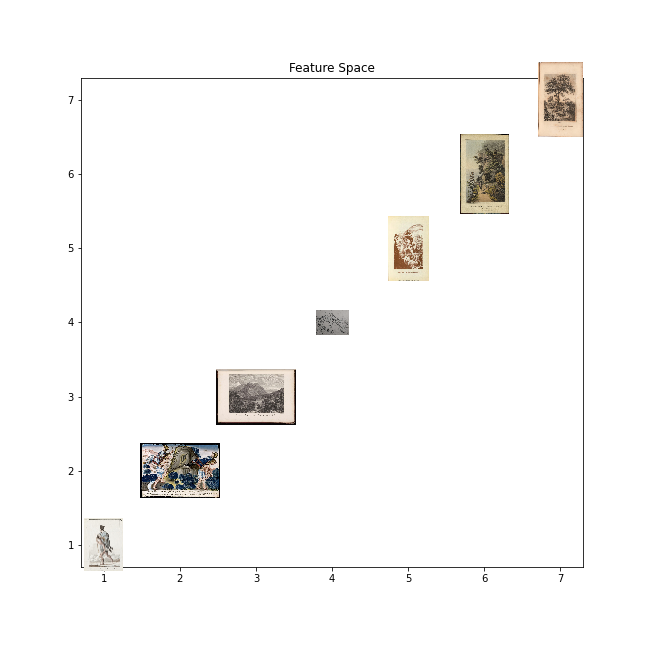

In [116]:
# Render the interactive panel

embed('@srsergiorodriguez/aventuraembed', cells=['showScenes', 'panelContainer'], inputs={'scenes': scenes, 'start': 'start' })

<cite data-cite="7299034/ZAMMD7FP"></cite>